# Principal Component Analysis

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv("https://raw.githubusercontent.com/garimachhikara128/DTU-ML-Lab-C4-G2/master/TrainingData/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
data.shape

(150, 6)

In [41]:
data = data.values
X = data[:,1:5]
Y = data[:,5]
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


## 1. Standardization

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
X_std = StandardScaler().fit_transform(X)

## 2. Covariance Matrix

In [44]:
X_cov = np.cov(X_std.T)
print(X_cov.shape)

(4, 4)


## 3. Eigen Vectors

In [45]:
evalue, evectors = np.linalg.eig(X_cov)

print(evalue)
print(evectors)


[2.93035378 0.92740362 0.14834223 0.02074601]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [46]:
# Create eigen pairs in which we have eigen vectors corresponding to eigen values
epairs = []

for i in range(len(evalue)) :
  epairs.append( [evalue[i], evectors[:,i]] )

# Sort the pairs on the basis of eigen values
epairs.sort(reverse = True)

for ep in epairs :
  print(ep)


[2.930353775589317, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])]
[0.9274036215173428, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])]
[0.14834222648163967, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])]
[0.020746013995595967, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627])]


In [47]:
# Pick top k eigen vectors
matrix = np.hstack ((epairs[0][1].reshape(4,1) , epairs[1][1].reshape(4,1)))
print(matrix)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [53]:
# Project the data points onto the new axis (evectors)
new_dp =  X_std.dot(matrix)

print(new_dp[0:5])

[[-2.26454173 -0.5057039 ]
 [-2.0864255   0.65540473]
 [-2.36795045  0.31847731]
 [-2.30419716  0.57536771]
 [-2.38877749 -0.6747674 ]]


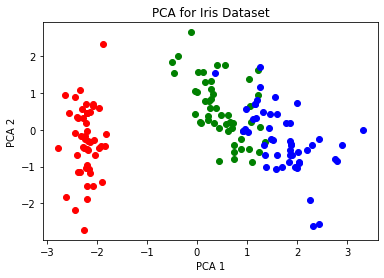

In [59]:
# show the new data points on a graph
for i in range(len(new_dp)) :

  if Y[i] == 'Iris-setosa' :
    plt.scatter( new_dp[i,0] , new_dp[i,1] , color = "red")

  elif Y[i] == 'Iris-versicolor' :
    plt.scatter( new_dp[i,0] , new_dp[i,1] , color = "green")

  elif Y[i] == 'Iris-virginica' :
    plt.scatter( new_dp[i,0] , new_dp[i,1] , color = "blue")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA for Iris Dataset")
plt.show()

In [56]:
print(np.unique(Y))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# NAIVE BAYES CLASSIFIER

In [60]:
import numpy as np
import pandas as pd

## Load the Data

In [61]:
df = pd.read_csv("https://raw.githubusercontent.com/garimachhikara128/DTU-ML-Lab-C4-G2/master/TrainingData/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [62]:
print(df.shape)

(8124, 23)


## Convert Categorical Data to Numerical Data

In [64]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [66]:
le = LabelEncoder()
nd = df.apply(le.fit_transform)
print(type(nd))
nd.head()

<class 'pandas.core.frame.DataFrame'>


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [69]:
# Convert pandas dataframe to numpy array
data = nd.values
print(data.shape)
print(type(data))

(8124, 23)
<class 'numpy.ndarray'>


In [70]:
Y = data[:,0]
X = data[:,1:]

print(Y.shape)
print(X.shape)

(8124,)
(8124, 22)


In [ ]:
Divid

In [72]:
# Break the data into 2 parts : training data & testing data
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6499, 22) (6499,)
(1625, 22) (1625,)
